# Working with Time Series

• **Time stamps** reference particular moments in time (e.g., July 4th, 2015, at 7:00 a.m.).

• **Time intervals and periods** reference a length of time between a particular beginning and end point—for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods constituting days).

• **Time deltas or durations** reference an exact length of time (e.g., a duration of 22.56 seconds)

## Dates and Times in Python

### Native Python dates and times: datetime and dateutil

In [32]:
from datetime import datetime
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn; seaborn.set()


In [9]:
# build a date using the datetime type:
# datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [7]:
# using the dateutil module to parse dates from a variety of string formats:
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [10]:
# printing the date of the week
date.strftime('%A')

'Saturday'

### Typed arrays of times: NumPy's datetime64
1. The **datetime64 dtype** encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.
2. The **datetime64** requires a very specific input format
3. With date formatted, vectorized oeprations

In [12]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [13]:
# With date formatted, vectorized oeprations
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [14]:
np.datetime64?

* One detail of the datetime64 and timedelta64 objects is that they are built on a fundamental time unit. 
* Because the datetime64 object is limited to 64-bit precision, the range of encodable times is 264 times this fundamental unit. 
* In other words, date time64 imposes a trade-off between time resolution and maximum time span.
    * Using > microsecond is more than enough for practical use in time span.
    * In real world, a useful default is datetime64[ns], as it can encode a useful range of modern dates with a suitably fine precision.

In [15]:
# day-based datetime
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [16]:
# minute-based datetime
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [18]:
np.datetime64('2015-07-04 12:00') + np.arange(12)

array(['2015-07-04T12:00', '2015-07-04T12:01', '2015-07-04T12:02',
       '2015-07-04T12:03', '2015-07-04T12:04', '2015-07-04T12:05',
       '2015-07-04T12:06', '2015-07-04T12:07', '2015-07-04T12:08',
       '2015-07-04T12:09', '2015-07-04T12:10', '2015-07-04T12:11'],
      dtype='datetime64[m]')

In [19]:
# ns-based time
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

### Dates and times in Pandas: Best of both worlds

Combines the ease of use of **datetime** and **dateutil** with the efficient storage and vectorized interface of numpy.datetime64.  

Signature: `pd.to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=None, box=True, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix')`

Docstring:
Convert argument to datetime.

Parameters

arg : integer, float, string, datetime, list, tuple, 1-d array, Series

    .. versionadded: 0.18.1

       or DataFrame/dict-like

errors : {'ignore', 'raise', 'coerce'}, default 'raise'

    - If 'raise', then invalid parsing will raise an exception
    - If 'coerce', then invalid parsing will be set as NaT
    - If 'ignore', then invalid parsing will return the input
dayfirst : boolean, default False
    Specify a date parse order if `arg` is str or its list-likes.
    If True, parses dates with the day first, eg 10/11/12 is parsed as
    2012-11-10.
    Warning: dayfirst=True is not strict, but will prefer to parse
    with day first (this is a known bug, based on dateutil behavior).

yearfirst : boolean, default False
    Specify a date parse order if `arg` is str or its list-likes.

    - If True parses dates with the year first, eg 10/11/12 is parsed as
      2010-11-12.
    - If both dayfirst and yearfirst are True, yearfirst is preceded (same
      as dateutil).

    Warning: yearfirst=True is not strict, but will prefer to parse
    with year first (this is a known bug, based on dateutil beahavior).

    .. versionadded: 0.16.1

utc : boolean, default None
    Return UTC DatetimeIndex if True (converting any tz-aware
    datetime.datetime objects as well).

box : boolean, default True

    - If True returns a DatetimeIndex
    - If False returns ndarray of values.

format : string, default None
    strftime to parse time, eg "%d/%m/%Y", note that "%f" will parse
    all the way up to nanoseconds.

exact : boolean, True by default

    - If True, require an exact format match.
    - If False, allow the format to match anywhere in the target string.

unit : string, default 'ns'
    unit of the arg (D,s,ms,us,ns) denote the unit, which is an
    integer or float number. This will be based off the origin.
    Example, with unit='ms' and origin='unix' (the default), this
    would calculate the number of milliseconds to the unix epoch start.

infer_datetime_format : boolean, default False
    If True and no `format` is given, attempt to infer the format of the
    datetime strings, and if it can be inferred, switch to a faster
    method of parsing them. In some cases this can increase the parsing
    speed by ~5-10x.

origin : scalar, default is 'unix'
    Define the reference date. The numeric values would be parsed as number
    of units (defined by `unit`) since this reference date.

    - If 'unix' (or POSIX) time; origin is set to 1970-01-01.
    - If 'julian', unit must be 'D', and origin is set to beginning of
      Julian Calendar. Julian day number 0 is assigned to the day starting
      at noon on January 1, 4713 BC.
    - If Timestamp convertible, origin is set to Timestamp identified by
      origin.

    .. versionadded: 0.20.0


In [4]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [5]:
date.strftime('%A')

'Saturday'

do NumPy-style vectorized oeprations directly

`pd.to_timedelta(arg, unit='ns', box=True, errors='raise')`

In [7]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas Time Series: Indexing by Time

*Index data by timestamps*

In [9]:
# Construct a Series object that has time-indexed data
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [10]:
# make use of the Series indexing patterns
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [11]:
# There are additional special date-only indexing operations, 
# such as passing a year to obtain a slice of all data from that year
data['2014']

2014-07-04    0
2014-08-04    1
dtype: int64

## Pandas Time Series Data Structures

• For time stamps, Pandas provides the Timestamp type. As mentioned before, it is essentially a replacement for Python’s native datetime, but is based on the more efficient numpy.datetime64 data type. The associated index structure is
DatetimeIndex.

• For time periods, Pandas provides the Period type. This encodes a fixed-frequency interval based on numpy.datetime64. The associated index structure is
PeriodIndex.

• For time deltas or durations, Pandas provides the Timedelta type. Timedelta is a more efficient replacement for Python’s native datetime.timedelta type, and is
based on numpy.timedelta64. The associated index structure is TimedeltaIndex.

 - Passing a single date to pd.to_datetime() yields a Timestamp;
 - Passing a series of dates by default yields a DatetimeIndex;
     - Any DatetimeIndex can be converted to a PeriodIndex with the to_period() functoin with the addition of a frequency code, e.g., use 'D' to indicate daily frequency.
     - A TimedeltaIndex is created when one date is subtracted from another

In [12]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                        '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [13]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [14]:
dates-dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences: pd.date_range()

Signature: pd.date_range(start=None, end=None, periods=None, freq='D', tz=None, normalize=False, name=None, closed=None, **kwargs)

Docstring:

Return a fixed frequency DatetimeIndex, with day (calendar) as the default
frequency

Parameters

start : string or datetime-like, default None
    Left bound for generating dates
    
end : string or datetime-like, default None
    Right bound for generating dates
    
periods : integer, default None
    Number of periods to generate
    
freq : string or DateOffset, default 'D' (calendar daily)
    Frequency strings can have multiples, e.g. '5H'
    
tz : string, default None
    Time zone name for returning localized DatetimeIndex, for example
    Asia/Hong_Kong
    
normalize : bool, default False
    Normalize start/end dates to midnight before generating date range
    
name : string, default None
    Name of the resulting DatetimeIndex
    
closed : string, default None
    Make the interval closed with respect to the given frequency to
    the 'left', 'right', or both sides (None)

Notes

Of the three parameters: ``start``, ``end``, and ``periods``, exactly two
must be specified.

In [16]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [17]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [18]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

<font color=red size=2> To create regular sequences of period or time delta values, the very similar pd.period_range() and pd.timedelta_range() functions are useful

In [19]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [20]:
# a sequence of durations increasing by an hour
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

## Frequencies and Offsets

<img src="files/freq_offsets.PNG" width=500>


* Change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:
    * Q-JAN, BQ-FEB, QS-MAR, BQS-APR, etc.
    * A-JAN, BA-FEB, AS-MAR, BAS-APR, etc.


* modify the split-point of the weekly frequency by adding a three-letter weekday code:
    * W-SUN, W-MON, W-TUE, W-WED, etc.


* combine with numbers to specify other frequencies

In [21]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

## Resampling, Shifting, and Windowing

Signature: data.DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, access_key=None)

Docstring:
    Imports data from a number of online sources.

Currently supports Google Finance, St. Louis FED (FRED),
and Kenneth French's data library, among others.

Parameters

name : str or list of strs
    the name of the dataset. Some data sources (google, fred) will
    accept a list of names.
    
data_source: {str, None}
    the data source ("google", "fred", "ff")
    
start : {datetime, None}
    left boundary for range (defaults to 1/1/2010)
    
end : {datetime, None}
    right boundary for range (defaults to today)
    
retry_count : {int, 3}
    Number of times to retry query request.
    
pause : {numeric, 0.001}
    Time, in seconds, to pause between consecutive queries of chunks. If
    single value given for symbol, represents the pause between retries.
    
session : Session, default None
    requests.sessions.Session instance to be used
    
access_key : (str, None)
    Optional parameter to specify an API key for certain data sources.

Examples

#### Data from Google Finance
aapl = DataReader("AAPL", "google")

#### Price and volume data from IEX
tops = DataReader(["GS", "AAPL"], "iex-tops")

#### Top of book executions from IEX
gs = DataReader("GS", "iex-last")

#### Real-time depth of book data from IEX
gs = DataReader("GS", "iex-book")

#### Data from FRED
vix = DataReader("VIXCLS", "fred")

#### Data from Fama/French
ff = DataReader("F-F_Research_Data_Factors", "famafrench")

ff = DataReader("F-F_Research_Data_Factors_weekly", "famafrench")

ff = DataReader("6_Portfolios_2x3", "famafrench")

ff = DataReader("F-F_ST_Reversal_Factor", "famafrench")


In [61]:
from pandas_datareader import data

In [71]:
goog = data.DataReader('GOOG', start='2004', end='2016',
                      data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.693783,47.669952,49.676899,49.845802,44994500.0,49.845802
2004-08-20,54.187561,49.925285,50.178635,53.805050,23005800.0,53.805050
2004-08-23,56.373344,54.172661,55.017166,54.346527,18393200.0,54.346527
2004-08-24,55.439419,51.450363,55.260582,52.096165,15361800.0,52.096165
2004-08-25,53.651051,51.604362,52.140873,52.657513,9257400.0,52.657513


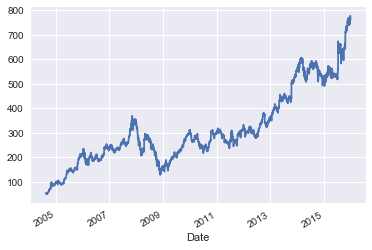

In [72]:
goog = goog['Close']
goog.plot()

### Resampling and converting frequencies

* down-sampling
    * resample() is fundamentally a data aggregation
    * asfreq() is fundamentally a data selection

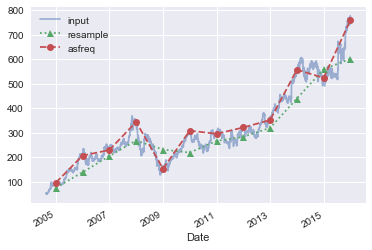

In [73]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style='^:')
goog.asfreq('BA').plot(style='o--');
plt.legend(['input', 'resample', 'asfreq'],
          loc='upper left')

# Notice the difference at each point
# resample reports the average of the previous year
# asfreq reports the value at the end of the year

* up-sampling
    * resample() and asfreq() are largely equivalent
    * resample has many more options available.

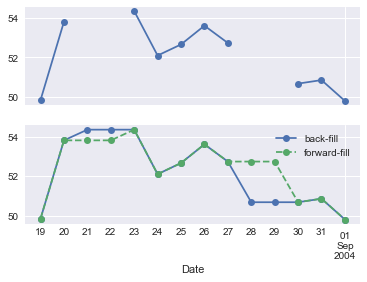

In [40]:
# resample the business day data at a daily frequency (i.e., including weekends)
fig, ax = plt.subplots(2, sharex=True)
data=goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(['back-fill', 'forward-fill']);

# Top: non-business days are left as NA and do not appear
# Bottom two: difference between forward- and backward-filling.

### Time-shifts
* shift() shifts the data
* tshift() fhists the index
* In both cases, the shift is specified in multiples of the frequency.

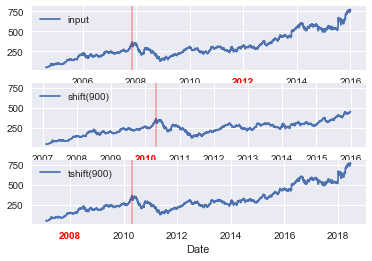

In [65]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red')

# shift(900) shifts the data by 900 days, 
    # pushing some of it off the end of the graph
    # and leaving NA values at the other end
# tshift(900) shifts the index values by 900 days

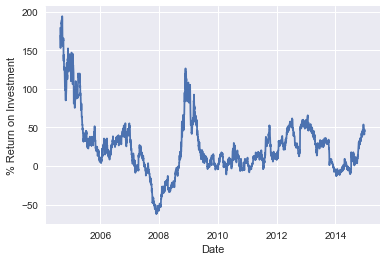

In [68]:
# computing difference over time

ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

### Rolling windows

* Rolling statistics are a third type of time series-specific operation implemented by Pandas
* Can be accomplished via the rolling() attribute of Series and Data Frame objects.
* Returns a view similar to what we saw with the groupby operation.
* Makes available a number of aggregation operations by default.

Signature: goog.rolling(window, min_periods=None, freq=None, center=False, win_type=None, on=None, axis=0, closed=None)

Docstring: Provides rolling window calculations.

Parameters

window : int, or offset
    Size of the moving window. This is the number of observations used for
    calculating the statistic. Each window will be a fixed size.

    If its an offset then this will be the time period of each window. Each
    window will be a variable sized based on the observations included in
    the time-period. This is only valid for datetimelike indexes. This is
    new in 0.19.0
    
min_periods : int, default None
    Minimum number of observations in window required to have a value
    (otherwise result is NA). For a window that is specified by an offset,
    this will default to 1.
    
freq : string or DateOffset object, optional (default None)
    .. deprecated:: 0.18.0
       Frequency to conform the data to before computing the statistic.
       Specified as a frequency string or DateOffset object.
       
center : boolean, default False
    Set the labels at the center of the window.
    
win_type : string, default None
    Provide a window type. See the notes below.
    
on : string, optional
    For a DataFrame, column on which to calculate
    the rolling window, rather than the index
    
closed : string, default None
    Make the interval closed on the 'right', 'left', 'both' or
    'neither' endpoints.
    For offset-based windows, it defaults to 'right'.
    For fixed windows, defaults to 'both'. Remaining cases not implemented
    for fixed windows.

    .. versionadded:: 0.20.0

axis : int or string, default 0

Returns

a Window or Rolling sub-classed for the particular operation

Notes

By default, the result is set to the right edge of the window. This can be
changed to the center of the window by setting ``center=True``.

The `freq` keyword is used to conform time series data to a specified
frequency by resampling the data. This is done with the default parameters
of :meth:`~pandas.Series.resample` (i.e. using the `mean`).

The recognized win_types are:

* ``boxcar``
* ``triang``
* ``blackman``
* ``hamming``
* ``bartlett``
* ``parzen``
* ``bohman``
* ``blackmanharris``
* ``nuttall``
* ``barthann``
* ``kaiser`` (needs beta)
* ``gaussian`` (needs std)
* ``general_gaussian`` (needs power, width)
* ``slepian`` (needs width).

If ``win_type=None`` all points are evenly weighted. To learn more about
different window types see `scipy.signal window functions

In [ ]:
# one-year centered rolling mean and std

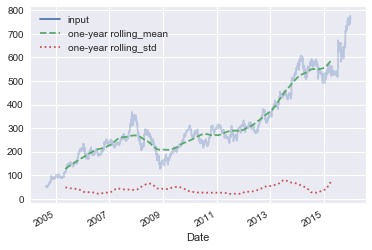

In [75]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input' : goog,
                    'one-year rolling_mean' : rolling.mean(),
                    'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

## Example: Visualizing Seattle Bicycle Counts

In [77]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  447k    0  447k    0     0   209k      0 --:--:--  0:00:02 --:--:--  209k
100 1135k    0 1135k    0     0   356k      0 --:--:--  0:00:03 --:--:--  356k
100 1474k    0 1474k    0     0   437k      0 --:--:--  0:00:03 --:--:--  437k


In [78]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [79]:
# Shortening the column names and adding a "Total" column
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

In [80]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


In [81]:
data.dropna().describe()

,West,East,Total
count,52527.000000,52527.000000,52527.000000
mean,57.563101,54.091343,111.654444
std,83.086986,70.726110,140.493300
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,29.000000,61.000000
75%,70.000000,72.000000,146.000000
max,717.000000,698.000000,957.000000


### Visualizing the data

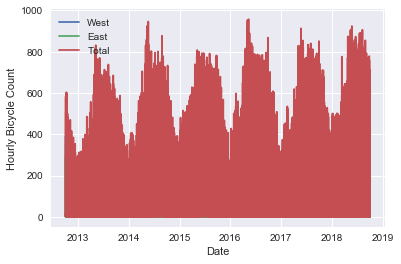

In [82]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

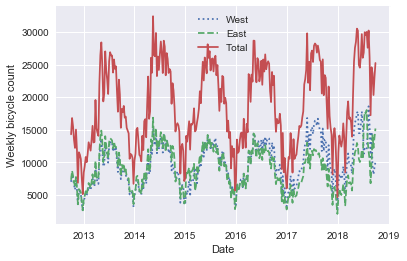

In [83]:
# resample by week
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

Text(0,0.5,'mean hourly count')

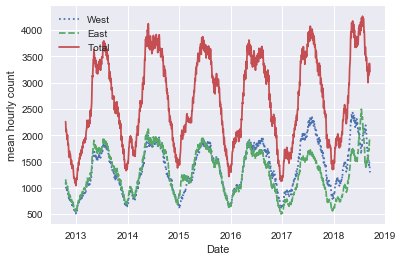

In [85]:
# 30-day rolling mean
daily = data.resample('D').sum()
daily.rolling(30, center=True).mean().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')

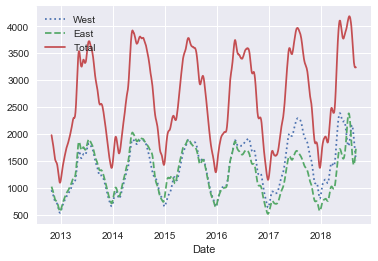

In [87]:
# Gaussian window to smoothe the edge
daily.rolling(50, center=True,
             win_type='gaussian').mean(std=10).plot(style=[':', '--', '-'])

### Digging into the data

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening. 

This is likely evidence of a strong component of commuter traffic crossing the bridge. 

This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

This shows a strong distinction between weekday and weekend totals, with around
twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

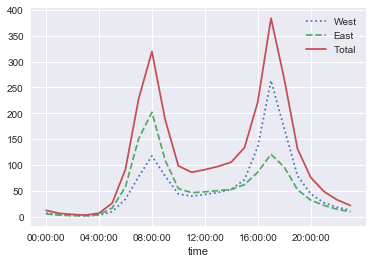

In [89]:
# average traffic as a function of the time of day
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

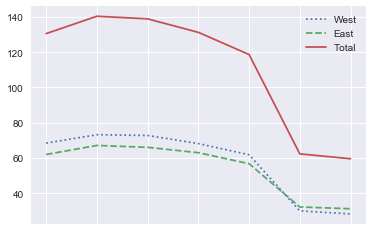

In [90]:
# how things change based on the day of the week
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

**np.where**

Docstring:
where(condition, [x, y])

Return elements, either from `x` or `y`, depending on `condition`.

If only `condition` is given, return ``condition.nonzero()``.

Parameters

condition : array_like, bool
    When True, yield `x`, otherwise yield `y`.
x, y : array_like, optional
    Values from which to choose. `x`, `y` and `condition` need to be
    broadcastable to some shape.

Returns

out : ndarray or tuple of ndarrays
    If both `x` and `y` are specified, the output array contains
    elements of `x` where `condition` is True, and elements from
    `y` elsewhere.

    If only `condition` is given, return the tuple
    ``condition.nonzero()``, the indices where `condition` is True.


<img src="files/np_where.png" width=500>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


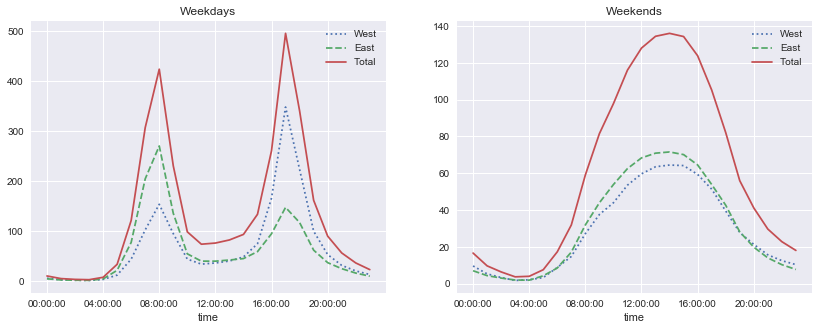

In [97]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                          xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                          xticks=hourly_ticks, style=[':', '--', '-']);

# The result is very interesting: 
# we see a bimodal commute pattern during the workweek, 
# and a unimodal recreational pattern during the weekends.

## Motivating query() and eval(): Compound Expressions

In [101]:
rng = np.random.RandomState(42)
x = rng.rand(1000000)
y = rng.rand(1000000)
%timeit x + y

4.11 ms ± 173 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [104]:
%timeit np.fromiter((xi + yi for xi, yi in zip(x, y)), dtype=x.dtype, count=len(x))

234 ms ± 9.31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [105]:
mask = (x > 0.5) & (y < 0.5)

In [106]:
import numexpr
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.allclose(mask, mask_numexpr)

# Numexpr evaluates the expression in a way that does not use full-sized 
# temporary arrays, and thus can be much more efficient than NumPy, 
# especially for large arrays.

True

### pandas.eval() for Efficient Operations

Signature: 
    pd.eval(expr, parser='pandas', engine=None, truediv=True, local_dict=None, global_dict=None, resolvers=(), level=0, target=None, inplace=False)

Docstring:
    Evaluate a Python expression as a string using various backends.

The following arithmetic operations are supported: ``+``, ``-``, ``*``,
``/``, ``**``, ``%``, ``//`` (python engine only) along with the following
boolean operations: ``|`` (or), ``&`` (and), and ``~`` (not).
Additionally, the ``'pandas'`` parser allows the use of :keyword:`and`,
:keyword:`or`, and :keyword:`not` with the same semantics as the
corresponding bitwise operators.  :class:`~pandas.Series` and
:class:`~pandas.DataFrame` objects are supported and behave as they would
with plain ol' Python evaluation.

* The eval() function in Pandas uses string expressions to efficiently compute operations using DataFrames.

In [110]:
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                     for i in range(4))

In [111]:
# typical Pandas approach
%timeit df1 + df2 + df3 + df4

96.6 ms ± 4.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [112]:
# pd.eval by constructing the expression as a string
%timeit pd.eval('df1 + df2 + df3 + df4')

# ~50% faster and uses much less memory

42.8 ms ± 459 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [113]:
np.allclose(df1 + df2 + df3 + df4, 
           pd.eval('df1 + df2 + df3 + df4'))

True

### Operations supported by pd.eval()

The following arithmetic operations are supported: ``+``, ``-``, ``*``,
``/``, ``**``, ``%``, ``//`` (python engine only) along with the following
boolean operations: ``|`` (or), ``&`` (and), and ``~`` (not).
Additionally, the ``'pandas'`` parser allows the use of :keyword:`and`,
:keyword:`or`, and :keyword:`not` with the same semantics as the
corresponding bitwise operators.  :class:`~pandas.Series` and
:class:`~pandas.DataFrame` objects are supported and behave as they would
with plain ol' Python evaluation.

In [114]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100,3)))
                          for i in range(5))

#### Arithmetic operators
* pd.eval() supports all arithmetic operators

#### Comparison operators
* pd.eval() supports all comparison operators, including chained expressions

#### Bitwise operators
* pd.eval() supports the & and | bitwise operators
* it supports the use of the literal `and` and `or` in Boolean expressions

#### Object attributes and indices
* pd.eval() supports access to object attributes via the obj.attr syntax, and indexes via the obj[index] syntax

In [116]:
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

In [118]:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

In [119]:
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In [120]:
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

True

In [121]:
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

## DataFrame.eval() for Column-Wise Operations

* Just as Pandas has a top-level pd.eval() function, DataFrames have an eval() method that works in similar ways
* The benefit of the eval() method is that columns can be referred to by name.
* DataFrame.eval() method allows much more succinct evaluation of expressions with the columns
* DataFrame.eval() allows assignment to any column. Similarly, any existing column can be modified.

In [122]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [123]:
# Expression example of pd.eval()
result1 = (df['A'] + df['B']) / (df['C'] -1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

In [124]:
# DataFrame.eval() method allows much more succinct evaluation 
# of expressions with the columns
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)
# here, treat column names as variables

True

In [126]:
# allow assignment to any column
df.eval('D = (A + B) / C', inplace = True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,11.187620
1,0.069087,0.235615,0.154374,1.973796
2,0.677945,0.433839,0.652324,1.704344
3,0.264038,0.808055,0.347197,3.087857
4,0.589161,0.252418,0.557789,1.508776


In [127]:
# any existing column can be modified
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,-0.449425
1,0.069087,0.235615,0.154374,-1.078728
2,0.677945,0.433839,0.652324,0.374209
3,0.264038,0.808055,0.347197,-1.566886
4,0.589161,0.252418,0.557789,0.603708


#### Local variables in DataFrame.eval()
`column_mean = df.mean(1)
result2 = df.eval('A + @column_mean')`

The @ character marks a *variable name* rather than a *column name*, and lets you efficiently evaluate expressions involving the two "namespaces": the namespaces of columns, and the namespace of Python objects.

Notice that this @ character is only supported by the DataFrame.eval() method, not by the pandas.eval() function, because the pandas.eval() function only has access to the one (Python) namespace.

In [129]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

## DataFrame.query() Method

* Query the columns of a frame with a boolean expression.
* More efficient computation
* Much easier to read and understand
* Accept the @flag to mark local variables

In [131]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

In [133]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

In [134]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

True